In [1]:
import pandas as pd;
import numpy as np;
import scipy as sp;
import sklearn;
import sys;
#from nltk.corpus import stopwords;
#import nltk;
from sklearn.feature_extraction import stop_words
from gensim.models import ldamodel
import gensim.corpora;
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer;
from sklearn.decomposition import NMF;
from sklearn.preprocessing import normalize;
import pickle;

In [2]:
df=pd.read_csv('./data/data_data_scientist.csv')

In [3]:
df.head()

,additional_information,job_ID,job_company,job_date,job_description,job_title,person_ID,skills
0,Core CompetenciesData Modeling & Visualization...,1,"TRILLO INC - San Francisco Bay Area, CA",January 2018 to Present,* Incorporate Machine Learning solutions to fa...,Data Scientist,1,"CLUSTERING (Less than 1 year), DATA MINING (Le..."
1,TECHNICAL EXPERTISEStatistics/Machine Learning...,1,"Pepsico - Plano, TX",September 2018 to Present,Fleet Analysis: Exploring the Truck repair and...,Data Scientist,2,"Hadoop (Less than 1 year), PYTHON (Less than 1..."
2,TECHNICAL EXPERTISEStatistics/Machine Learning...,2,"CISCO - San Jose, CA",May 2018 to July 2018,Developed Python scripts to automate the load...,Data Scientist,2,"Hadoop (Less than 1 year), PYTHON (Less than 1..."
3,TECHNICAL EXPERTISEStatistics/Machine Learning...,3,"PHOTON INFOTECH - Bohemia, NY",September 2017 to March 2018,Developed a personalized recommender engine fo...,Data Scientist,2,"Hadoop (Less than 1 year), PYTHON (Less than 1..."
4,TECHNICAL EXPERTISEStatistics/Machine Learning...,4,"APPLE INC - Cupertino, CA",January 2016 to August 2017,Played a key role in developing and maintainin...,Data Scientist,2,"Hadoop (Less than 1 year), PYTHON (Less than 1..."


In [4]:
def find_data_scientist(title_value):
    target = 'data scientist'
    if type(title_value) == float:
        return -1
    elif type(title_value) ==str:
        if title_value.lower().find(target) >=0:
            return 1
        else:
            return 0

In [5]:
is_data_scientist =df.job_title.map(find_data_scientist)

### Add is_data_scientist column to indicate whether the title has data scientist

In [6]:
df['is_data_scientist']=is_data_scientist

In [8]:
df_new = df.dropna(subset =['job_description'])
df_new.reset_index(drop =True, inplace =True)

### Create a new data frame, which only contains data scientist in job title

In [10]:
df_data_scientist = df_new[df_new.is_data_scientist==1]

In [11]:
df_data_scientist.shape

(6312, 9)

In [12]:
df_data_scientist.head()

,additional_information,job_ID,job_company,job_date,job_description,job_title,person_ID,skills,is_data_scientist
0,Core CompetenciesData Modeling & Visualization...,1,"TRILLO INC - San Francisco Bay Area, CA",January 2018 to Present,* Incorporate Machine Learning solutions to fa...,Data Scientist,1,"CLUSTERING (Less than 1 year), DATA MINING (Le...",1
1,TECHNICAL EXPERTISEStatistics/Machine Learning...,1,"Pepsico - Plano, TX",September 2018 to Present,Fleet Analysis: Exploring the Truck repair and...,Data Scientist,2,"Hadoop (Less than 1 year), PYTHON (Less than 1...",1
2,TECHNICAL EXPERTISEStatistics/Machine Learning...,2,"CISCO - San Jose, CA",May 2018 to July 2018,Developed Python scripts to automate the load...,Data Scientist,2,"Hadoop (Less than 1 year), PYTHON (Less than 1...",1
3,TECHNICAL EXPERTISEStatistics/Machine Learning...,3,"PHOTON INFOTECH - Bohemia, NY",September 2017 to March 2018,Developed a personalized recommender engine fo...,Data Scientist,2,"Hadoop (Less than 1 year), PYTHON (Less than 1...",1
4,TECHNICAL EXPERTISEStatistics/Machine Learning...,4,"APPLE INC - Cupertino, CA",January 2016 to August 2017,Played a key role in developing and maintainin...,Data Scientist,2,"Hadoop (Less than 1 year), PYTHON (Less than 1...",1


In [13]:
df_data_scientist.reset_index(drop = True, inplace =True)

In [14]:
data_text = df_data_scientist[['job_description']]

In [15]:
'a' in stop_words.ENGLISH_STOP_WORDS

True

In [16]:
num = []
data_text = df_data_scientist[['job_description']]
for idx in range(len(data_text)):
    if type(data_text.iloc[idx]['job_description']) !=str:
        num.append(idx)
        
print(num)

[]


## <span style="color:red">LDA model</span>

In [17]:
for idx in range(len(data_text)):
    
    #go through each word in each data_text row, remove stopwords, and set them on the index.
    data_text.iloc[idx]['job_description'] = [word for word in \
                                              data_text.iloc[idx]['job_description'].replace('*','').split(' ')\
                                              if word not in stop_words.ENGLISH_STOP_WORDS]

In [19]:
len(data_text.iloc[0].values[0])

81

In [20]:
train_description = [value[0] for value in data_text.iloc[0:].values]

In [21]:
num_topics = 5

In [22]:
id2word = gensim.corpora.Dictionary(train_description);
corpus = [id2word.doc2bow(text) for text in train_description];
lda = ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics);

In [23]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [24]:
df_LDA =get_lda_topics(lda, num_topics)

In [25]:
df_LDA

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,,,,data,data
1,data,data,data,,
2,using,using,Data,using,using
3,Data,Data,using,business,Python
4,learning,various,analysis,model,models
5,analysis,SQL,Python,models,feature
6,Developed,Worked,various,learning,learning
7,SQL,models,models,analysis,model
8,various,analysis,learning,Developed,SQL
9,machine,learning,machine,machine,Used


## <span style="color:red">SVD model</span>

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
Tf_vectorizer = TfidfVectorizer(stop_words = 'english', max_features=5000)

In [30]:
df_data_scientist[['job_description']].shape

(6312, 1)

In [37]:
vector_TF = Tf_vectorizer.fit_transform(df_data_scientist.job_description)

In [38]:
print(vector_TF.shape)

(6312, 5000)


In [39]:
U, s, Vh = np.linalg.svd(vector_TF.todense(), full_matrices=False)

In [40]:
U.shape

(6312, 5000)

In [41]:
s.shape

(5000,)

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline  

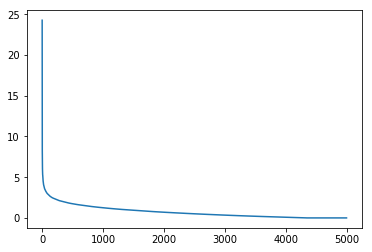

In [44]:
plt.plot(s)

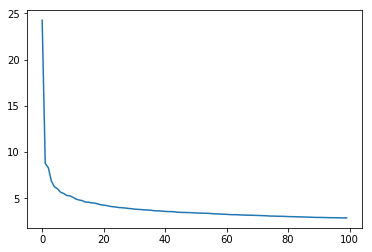

In [46]:
plt.plot(s[:100])

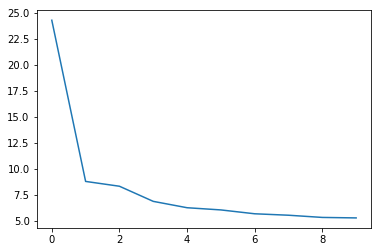

In [48]:
plt.plot(s[:10])

The first 10 topics have very high weight 

In [50]:
print(Tf_vectorizer.get_feature_names()[100:110])

['ability', 'able', 'abnormal', 'abstract', 'abuse', 'academic', 'accelerated', 'acceptance', 'access', 'accessibility']


In [52]:
df_u=pd.DataFrame(U)

In [54]:
df_u.iloc[:20, :10]

,0,1,2,3,4,5,6,7,8,9
0,-0.007685,0.000111,-0.014332,0.002131,0.002227,-0.003838,-0.008213,-0.009368,-0.008264,-0.001157
1,-0.007152,0.005238,-0.010750,-0.000388,-0.003169,-0.001107,0.004101,-0.007559,-0.002564,0.005735
2,-0.014497,-0.014961,-0.009209,-0.021948,0.004186,-0.005272,-0.006487,-0.014314,0.005844,0.023834
3,-0.008539,0.004839,-0.003360,0.003834,0.004749,0.003574,0.009131,0.010419,-0.003685,0.010526
4,-0.004349,0.002635,-0.003962,0.011136,0.000282,-0.006732,0.006465,-0.005969,-0.002285,-0.002395
5,-0.005937,-0.002912,-0.004195,-0.001886,-0.013590,0.009213,0.010586,0.006129,-0.007350,0.002999
6,-0.012761,0.016243,-0.013360,0.005287,0.008908,-0.009569,-0.014892,0.000945,0.013389,-0.002791
7,-0.004939,0.006360,-0.002881,0.004698,0.010192,0.005314,-0.008437,0.005294,0.002293,-0.003427
8,-0.003008,0.006781,-0.003124,0.004108,-0.000157,0.003969,0.016808,0.003753,-0.004599,0.002972
9,-0.009848,0.008837,-0.006176,0.001750,0.002013,-0.003343,0.005345,0.001120,0.000458,0.007190


In [60]:
df_Vh =pd.DataFrame(Vh)

In [61]:
df_Vh.shape

(5000, 5000)

In [64]:
feature_name = Tf_vectorizer.get_feature_names()

In [65]:
column_name =[]
for i in range(5000):
    column_name.append(feature_name[i])

In [66]:
df_Vh.columns = column_name

In [69]:
df_Vh.iloc[:20,100:110]

,ability,able,abnormal,abstract,abuse,academic,accelerated,acceptance,access,accessibility
0,-0.002632,-0.009873,-0.000909,-0.000859,-0.001010,-0.001560,-0.001016,-0.002496,-0.016825,-0.001286
1,0.001332,-0.015174,0.002191,0.000404,0.002054,0.001958,0.002409,-0.001536,-0.016566,-0.002698
2,-0.007300,0.009272,-0.002958,-0.003592,-0.003586,-0.004795,-0.002593,-0.006566,-0.014008,-0.001616
3,0.001521,0.001958,0.001095,0.000619,0.002053,0.000895,0.002354,-0.004327,-0.012528,0.001057
4,0.000314,0.045353,0.000237,0.002407,0.001437,0.003248,0.000641,-0.004308,-0.008303,-0.000994
5,-0.002638,-0.004353,0.001393,-0.002369,-0.002535,-0.002077,0.000949,0.000990,-0.006685,-0.004759
6,-0.000881,0.042449,-0.001954,-0.003435,-0.003428,-0.003964,-0.002474,0.001150,-0.013198,-0.001325
7,-0.000922,0.023021,0.002517,-0.003382,0.002532,-0.001476,0.004001,0.002889,0.004897,-0.002323
8,0.000361,-0.025652,-0.000241,-0.000861,0.000486,0.001153,-0.000933,0.003285,0.007796,-0.000113
9,-0.004962,-0.001754,-0.000262,0.001005,-0.002686,-0.000092,-0.001496,-0.003498,-0.002558,0.003957


## <span style="color:red">kmeans on top of TFIDF</span> 

In [55]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
norm_vector = MinMaxScaler().fit_transform(vector_TF.todense())

In [58]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'inertia value')

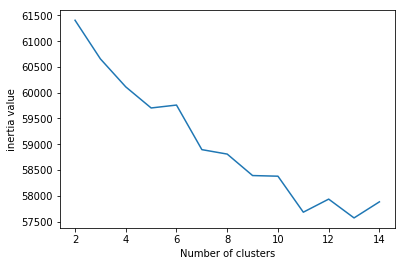

In [59]:
cluster_list = range(2,15)
inertia_value=[]
for i in cluster_list:
    KM_norm = KMeans(n_clusters=i)
    KM_norm.fit(norm_vector)
    inertia_value.append(KM_norm.inertia_)
    
plt.plot(list(cluster_list), inertia_value)
plt.xlabel('Number of clusters')
plt.ylabel('inertia value')

### At around 11 clusters, we see elbow.

## <span style="color:red">NMF method</span> 

In [70]:
vector_TF_norm = normalize(vector_TF, norm='l1', axis=1)

In [71]:
num_topics =10
#obtain a NMF model.
model = NMF(n_components=num_topics, init='nndsvd');
#fit the model
model.fit(vector_TF_norm)

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0,
  max_iter=200, n_components=10, random_state=None, shuffle=False,
  solver='cd', tol=0.0001, verbose=0)

In [72]:
def get_nmf_topics(model, n_top_words):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = Tf_vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(num_topics):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);

In [73]:
df_NMF = get_nmf_topics(model, 20)

In [74]:
df_NMF

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10
0,using,data,usa,worked,visualization,model,learning,music,2018,zip
1,python,science,jun,keyword,analysis,analysis,machine,app,scientist,company
2,sql,analysis,sciences,extraction,python,developed,deep,dataset,present,state
3,models,scientist,computer,retailer,techniques,analytics,spark,ranking,january,com
4,used,big,corporation,kinds,statistical,customer,algorithms,model,current,www
5,regression,development,iot,looking,growing,business,science,ultimately,developer,searching
6,tableau,web,tech,program,mining,team,detection,apple,jun,work
7,learn,mining,france,training,js,product,natural,histogram,lead,ruby
8,various,cleaning,emerging,major,web,models,research,web,software,http
9,scikit,warehouse,remotely,advanced,startup,marketing,language,advised,2016,linkedin
